<a href="https://colab.research.google.com/github/ashu131998/Convolutional-Neural-Networks-for-Small-Mobile-Devices/blob/master/VGG16_pc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import os
from keras.utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 15
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

In [ ]:
import tensorflow as tf 

In [ ]:
model.add(Conv2D(4, kernel_size=(3, 3),padding='same',input_shape=input_shape))
model.add(Activation("relu"))
model.add(Conv2D(4, (3, 3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation("relu"))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Dropout(0.25))

model.add(Dense(num_classes))
model.add(Activation("softmax"))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 4)         148       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         296       
_

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 45s 751us/step - loss: 0.3405 - acc: 0.8953 - val_loss: 0.1229 - val_acc: 0.9625
Epoch 2/15
60000/60000 [==============================] - 44s 737us/step - loss: 0.1299 - acc: 0.9612 - val_loss: 0.0685 - val_acc: 0.9779
Epoch 3/15
60000/60000 [==============================] - 44s 739us/step - loss: 0.0988 - acc: 0.9698 - val_loss: 0.0569 - val_acc: 0.9822
Epoch 4/15
60000/60000 [==============================] - 45s 750us/step - loss: 0.0850 - acc: 0.9745 - val_loss: 0.0484 - val_acc: 0.9840
Epoch 5/15
60000/60000 [==============================] - 45s 752us/step - loss: 0.0752 - acc: 0.9781 - val_loss: 0.0483 - val_acc: 0.9841
Epoch 6/15
60000/60000 [==============================] - 46s 761us/step - loss: 0.0687 - acc: 0.9788 - val_loss: 0.0429 - val_acc: 0.9857
Epoch 7/15
600

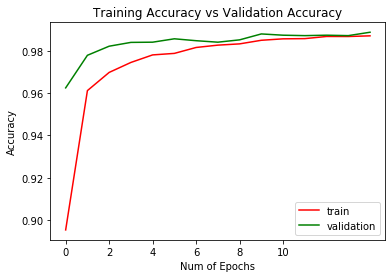

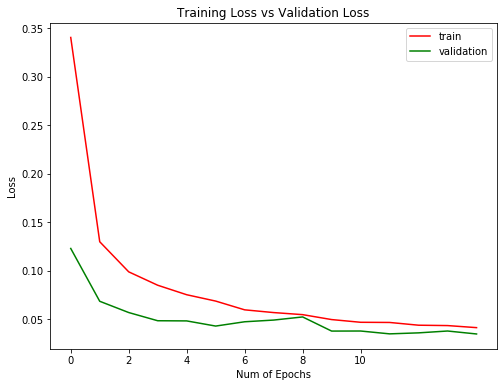

In [ ]:
cnn=history
import numpy as np
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))


Test loss: 3.48%
Test Accuracy: 98.88%


Class:  0


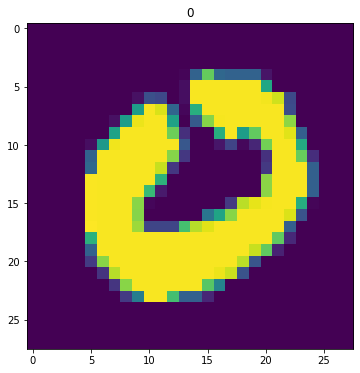

In [ ]:
img = x_test[25]
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()